<a href="https://colab.research.google.com/github/elsy-torres/S-T/blob/main/FFT-100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from scipy import fftpack

#Cargar datos 

In [3]:
data=pd.read_csv('NZ007.txt',names=['time','amp'],skiprows=3,sep='\s+',engine='python')
data.head(10)

,time,amp
0,0.00,-0.244690
1,0.02,0.055570
2,0.04,0.034080
3,0.06,-0.035078
4,0.08,0.065622
5,0.10,0.045962
6,0.12,0.007326
7,0.14,-0.012271
8,0.16,-0.046718
9,0.18,-0.049188


In [4]:
data.tail()

,time,amp
16443,328.86,0.72716
16444,328.88,0.61736
16445,328.90,0.54991
16446,328.92,0.59976
16447,328.94,0.41080


In [73]:
print(len(data))

16448


# Declarar vector en el dominio de la frcuencia

##Vector para el sismograma completo

In [74]:
fo=1/328.94
N=len(data)
F_N=(N/2)*fo
t=np.arange(fo,F_N,fo)
print(t)

[3.04006810e-03 6.08013620e-03 9.12020429e-03 ... 2.49923998e+01
 2.49954399e+01 2.49984800e+01]


In [75]:
y_1= data['amp'].iloc[0:6000]
print(len(y_1))

6000


In [76]:
print(y_1)

0      -0.244690
1       0.055570
2       0.034080
3      -0.035078
4       0.065622
          ...   
5995   -3.450900
5996   -3.383200
5997   -3.486800
5998   -4.161800
5999   -4.447400
Name: amp, Length: 6000, dtype: float64


In [77]:
fo=1/120
n=len(y_1)
F_N1=(n/2)*fo
f_1=np.arange(fo,F_N1,fo)

In [78]:
#f_2=np.arange(120*fo,F_N1,fo)
#print(f_2)

In [79]:
print(len(f_1))

2999


In [80]:
print(f_1)

[8.33333333e-03 1.66666667e-02 2.50000000e-02 ... 2.49750000e+01
 2.49833333e+01 2.49916667e+01]


In [81]:
w_2=1/f_1
print(w_2)

[1.20000000e+02 6.00000000e+01 4.00000000e+01 ... 4.00400400e-02
 4.00266845e-02 4.00133378e-02]


# Vector de tiempo de 0 a 120 s

In [82]:
t_1= np.arange(0,120,0.02)
print(len(t_1))

6000


# Vector de tiempo de 120 a 240 s

In [83]:
t_2=np.arange(120,240,0.02)
print(len(t_2))

6000


In [84]:
y_1= data['amp'].iloc[0:6000]
print(len(y_1))

6000


In [85]:
y_2=data['amp'].iloc[6000:12000]
print(len(y_2))

6000


# Declarar vector de filtro

In [18]:
data['filtro']=1
data

,time,amp,filtro
0,0.00,-0.244690,1
1,0.02,0.055570,1
2,0.04,0.034080,1
3,0.06,-0.035078,1
4,0.08,0.065622,1
...,...,...,...
16443,328.86,0.727160,1
16444,328.88,0.617360,1
16445,328.90,0.549910,1
16446,328.92,0.599760,1


In [86]:
#matriz=np.ones(len(t_1)),np.ones(len(t_2))
#print(matriz)
#print(matriz[0])

In [87]:
filtro_1=np.ones(len(t_1))

In [21]:
data['filtro'].iloc[data.index<1000]=signal.cosine(1000)
data['filtro'].iloc[data.index>15447]=signal.cosine(1000)
data.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,time,amp,filtro
16443,328.86,0.72716,0.014137
16444,328.88,0.61736,0.010995
16445,328.90,0.54991,0.007854
16446,328.92,0.59976,0.004712
16447,328.94,0.41080,0.001571


In [88]:
filtro_1[0:600]=signal.cosine(600)
filtro_1[5400:6000]=signal.cosine(600)

In [89]:
signal_filter_1=filtro_1*y_1
print(signal_filter_1)

0      -0.000641
1       0.000436
2       0.000446
3      -0.000643
4       0.001546
          ...   
5995   -0.081302
5996   -0.061997
5997   -0.045641
5998   -0.032686
5999   -0.011643
Name: amp, Length: 6000, dtype: float64


In [90]:
signal_filter_2=filtro_1*y_2
print(signal_filter_2)

6000    -0.011314
6001    -0.034751
6002    -0.062011
6003    -0.088649
6004    -0.111235
           ...   
11995   -0.067084
11996   -0.052615
11997   -0.038596
11998   -0.023003
11999   -0.007696
Name: amp, Length: 6000, dtype: float64


In [25]:
data['signal_filter']= data['filtro']*data['amp']
data.head()

,time,amp,filtro,signal_filter
0,0.00,-0.244690,0.001571,-0.000384
1,0.02,0.055570,0.004712,0.000262
2,0.04,0.034080,0.007854,0.000268
3,0.06,-0.035078,0.010995,-0.000386
4,0.08,0.065622,0.014137,0.000928


# Gráficos

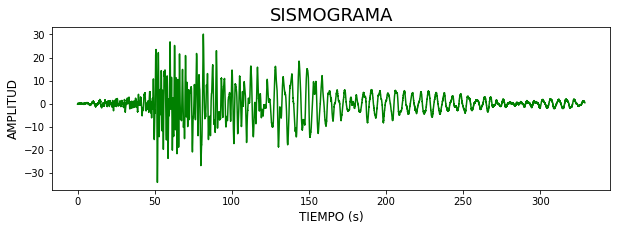

In [130]:
fig = plt.figure(figsize=(10,3))
plt.plot(data['time'],data['amp'],'green')
plt.ylabel('AMPLITUD', fontsize=12,fontname='times new roman')
plt.xlabel('TIEMPO (s)', fontsize=12,fontname='times new roman')
plt.title('SISMOGRAMA', fontsize=18,fontname='times new roman')
_=plt.show()

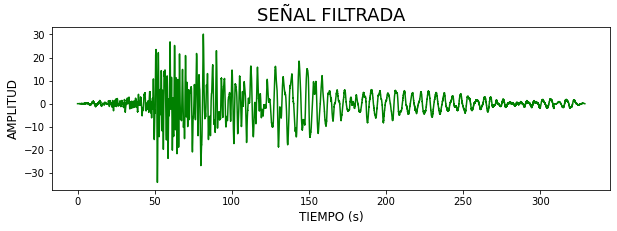

In [129]:
fig = plt.figure(figsize=(10,3))
plt.plot(data['time'],data['signal_filter'],'green')
plt.ylabel('AMPLITUD', fontsize=12,fontname='times new roman')
plt.xlabel('TIEMPO (s)', fontsize=12,fontname='times new roman')
plt.title('SEÑAL FILTRADA', fontsize=18,fontname='times new roman')
_=plt.show()

# Cortes de ventana de 0-120, 120-240 sin filtrar


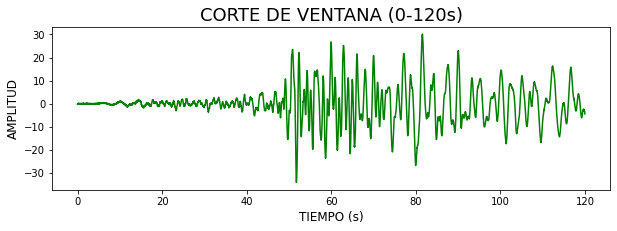

In [152]:
fig = plt.figure(figsize=(10,3))
plt.plot(t_1,y_1,'green')
plt.ylabel('AMPLITUD', fontsize=12,fontname='times new roman')
plt.xlabel('TIEMPO (s)', fontsize=12,fontname='times new roman')
plt.title('CORTE DE VENTANA (0-120s)', fontsize=18,fontname='times new roman')
_=plt.show()

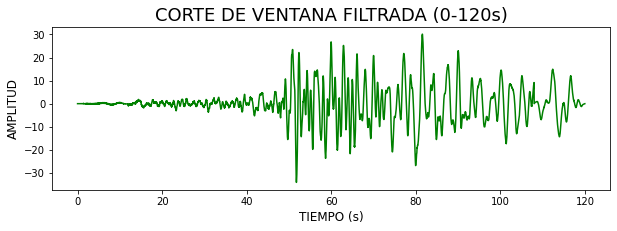

In [153]:
fig = plt.figure(figsize=(10,3))
plt.plot(t_1,signal_filter_1,'green')
plt.ylabel('AMPLITUD', fontsize=12,fontname='times new roman')
plt.xlabel('TIEMPO (s)', fontsize=12,fontname='times new roman')
plt.title('CORTE DE VENTANA FILTRADA (0-120s)', fontsize=18,fontname='times new roman')
_=plt.show()

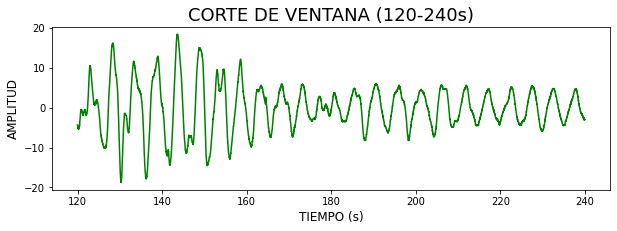

In [126]:
fig = plt.figure(figsize=(10,3))
plt.plot(t_2,y_2,'green')
plt.ylabel('AMPLITUD', fontsize=12,fontname='times new roman')
plt.xlabel('TIEMPO (s)', fontsize=12,fontname='times new roman')
plt.title('CORTE DE VENTANA (120-240s)', fontsize=18,fontname='times new roman')

_=plt.show()

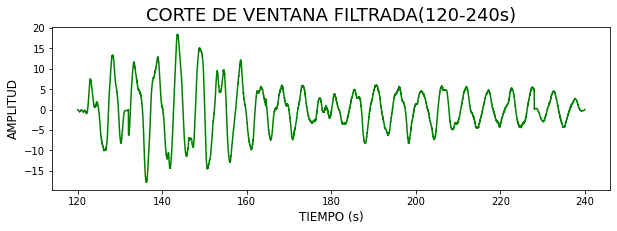

In [123]:
fig = plt.figure(figsize=(10,3))
plt.plot(t_2,signal_filter_2,'green')
plt.ylabel('AMPLITUD', fontsize=12,fontname='times new roman')
plt.xlabel('TIEMPO (s)', fontsize=12,fontname='times new roman')
plt.title('CORTE DE VENTANA FILTRADA (120-240s)', fontsize=18,fontname='times new roman')
_=plt.show()

# Realizar la transformada

In [32]:
#u = lambda R: np.piecewise(R,R>=0,[1,0])

In [33]:
#u2 = np.piecewise(R,R>=-1,[1,0])
#u4= np.piecewise(R,R>=1,[1,0])

In [34]:
#R=np.arange(-5,5,0.1)
#u0 = u(R-0)


In [35]:
#print(len(R))

In [36]:
#fft_prueba=np.fft.fft(rectangular)

In [37]:
#fft_prueba2 = (fftpack.fft(rectangular))

In [38]:
#asb_prueba=(np.abs(fft_prueba2))/10


In [39]:
#plt.plot(R,asb_prueba)
#_=plt.show()

In [40]:

#rectangular = u2 - u4

In [41]:
#plt.plot(R,rectangular)
#_=plt.show()


In [42]:
data['fft']=np.fft.fft(data['signal_filter'])
data.head()

,time,amp,filtro,signal_filter,fft
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j


In [43]:
n_max=np.max(data['fft'])
print(n_max)

(15736.778162199342+207.93518572416633j)


In [44]:
fft_1=np.fft.fft(signal_filter_1)
print(fft_1)

[89.40948361 +0.j         88.0897012  -3.24456974j
 82.5949093  +2.10771775j ... 69.861184  -18.50110287j
 82.5949093  -2.10771775j 88.0897012  +3.24456974j]


In [45]:
fft_2=np.fft.fft(signal_filter_2)
print(fft_2)

[501.95929115  +0.j         449.13224274-146.02838955j
 264.17885501-279.02881248j ... -39.03984732+269.77143875j
 264.17885501+279.02881248j 449.13224274+146.02838955j]


#Calcular la amplitud espectral

In [46]:
data['asb']= (np.absolute(data['fft']))/16448
data.head()

,time,amp,filtro,signal_filter,fft,asb
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j,0.000841
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j,0.002945
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j,0.001799
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j,0.003630
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j,0.002637


In [47]:
n_max=np.max(data['asb'])
print(n_max)

1.1799156635129986


In [48]:
h=len(y_1)
print(h)

6000


In [49]:
h=len(y_2)
print(h)

6000


In [50]:
asb_1=((np.abs(fft_1))/6000)
print(asb_1)

[0.01490158 0.01469157 0.0137703  ... 0.01204491 0.0137703  0.01469157]


In [51]:
n_max=np.max(asb_1)
print(n_max)

1.099204330417359


In [52]:
asb_2=((np.abs(fft_2))/6000)
print(asb_2)

[0.08365988 0.07871257 0.06404155 ... 0.04543027 0.06404155 0.07871257]


In [53]:
n_max=np.max(asb_2)
print(n_max)

2.5454776251264932


In [54]:
print(len(asb_1))

6000


In [55]:
print(len(asb_2))

6000


# Calcular la fase

In [56]:
data['angle']=np.angle(data['fft'])
data.head()

,time,amp,filtro,signal_filter,fft,asb,angle
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j,0.000841,-1.026885e-15
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j,0.002945,4.764827e-01
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j,0.001799,1.465820e+00
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j,0.003630,1.167415e+00
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j,0.002637,2.121294e+00


In [57]:
angle_1=np.angle(fft_1)

In [58]:
angle_2=np.angle(fft_2)

In [59]:
data['ANGLE']=np.degrees(data['angle'])
data.head()

,time,amp,filtro,signal_filter,fft,asb,angle,ANGLE
0,0.00,-0.244690,0.001571,-0.000384,13.838794-0.000000j,0.000841,-1.026885e-15,-5.883620e-14
1,0.02,0.055570,0.004712,0.000262,43.041462+22.215780j,0.002945,4.764827e-01,2.730045e+01
2,0.04,0.034080,0.007854,0.000268,3.100171+29.423475j,0.001799,1.465820e+00,8.398529e+01
3,0.06,-0.035078,0.010995,-0.000386,23.437134+54.915609j,0.003630,1.167415e+00,6.688796e+01
4,0.08,0.065622,0.014137,0.000928,-22.689074+36.965522j,0.002637,2.121294e+00,1.215412e+02


In [60]:
w=1./t
print(w)

[3.28940000e+02 1.64470000e+02 1.09646667e+02 ... 4.00121640e-02
 4.00072975e-02 4.00024322e-02]


#Gráficos

# Espectro de ampitud en el dominio de la frecuencia

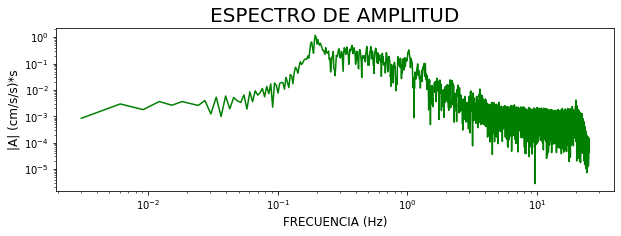

In [108]:
fig = plt.figure(figsize=(10,3))
plt.loglog(t,data['asb'].iloc[0:8223],'green')
plt.ylabel('|A| (cm/s/s)*s', fontsize=12,fontname='times new roman')
plt.xlabel('FRECUENCIA (Hz)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE AMPLITUD', fontsize=20,fontname='times new roman')


_=plt.show()

# Espectro de amplitud en el dominio del tiempo

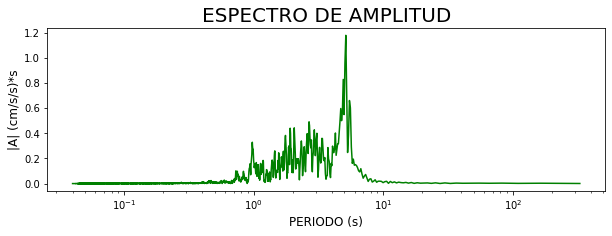

In [110]:
fig = plt.figure(figsize=(10,3))
plt.semilogx(w,(data['asb'][0:8223]),'green')
plt.ylabel('|A| (cm/s/s)*s', fontsize=12,fontname='times new roman')
plt.xlabel('PERIODO (s)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE AMPLITUD', fontsize=20,fontname='times new roman')
_=plt.show()

#FASE

## ESPECTRO DE FASE EN EL DOMINIO DE LA FRECUENCIA

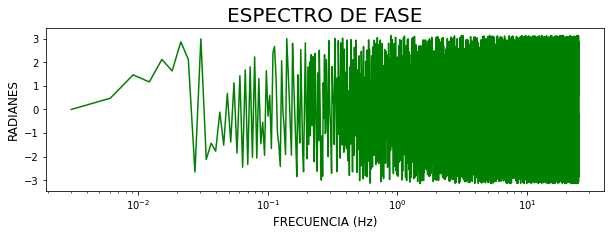

In [156]:
fig = plt.figure(figsize=(10,3))
plt.semilogx(t,(data['angle'].iloc[0:8223]),'g')
plt.ylabel('RADIANES', fontsize=12,fontname='times new roman')
plt.xlabel('FRECUENCIA (Hz)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE FASE', fontsize=20,fontname='times new roman')
_=plt.show()

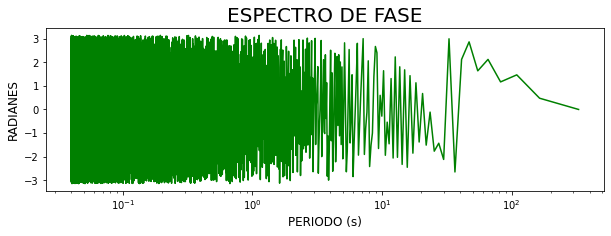

In [155]:
fig = plt.figure(figsize=(10,3))
plt.semilogx(w,data['angle'][0:8223],'g')
plt.ylabel('RADIANES', fontsize=12,fontname='times new roman')
plt.xlabel('PERIODO (s)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE FASE', fontsize=20,fontname='times new roman')
_=plt.show()

# Corte de ventana de 0-120s

## Espectro de amplitudes espectrales

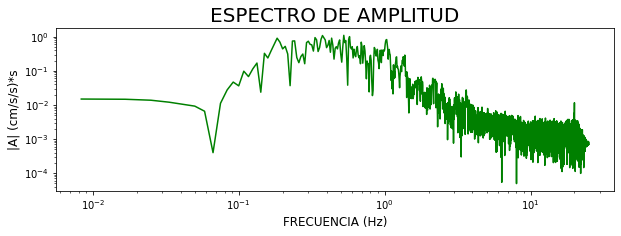

In [116]:

fig = plt.figure(figsize=(10,3))
plt.loglog(f_1,asb_1[0:2999],'g')
plt.ylabel('|A| (cm/s/s)*s', fontsize=12,fontname='times new roman')
plt.xlabel('FRECUENCIA (Hz)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE AMPLITUD', fontsize=20,fontname='times new roman')
_=plt.show()

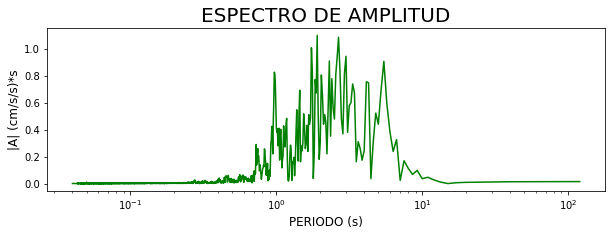

In [118]:
fig = plt.figure(figsize=(10,3))
plt.semilogx(w_2,asb_1[0:2999],'g')
plt.ylabel('|A| (cm/s/s)*s', fontsize=12,fontname='times new roman')
plt.xlabel('PERIODO (s)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE AMPLITUD', fontsize=20,fontname='times new roman')
_=plt.show()
_=plt.show()

# Espectro

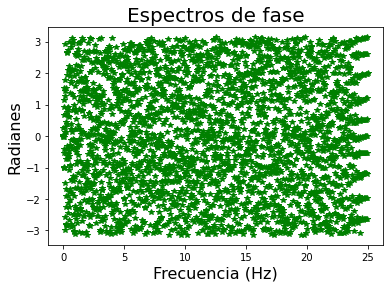

In [66]:
plt.plot(f_1,angle_1[0:2999],'g*')
plt.ylabel('Radianes', fontsize=16,fontname='times new roman')
plt.xlabel('Frecuencia (Hz)', fontsize=16,fontname='times new roman')
plt.title('Espectros de fase', fontsize=20,fontname='times new roman')
_=plt.show()

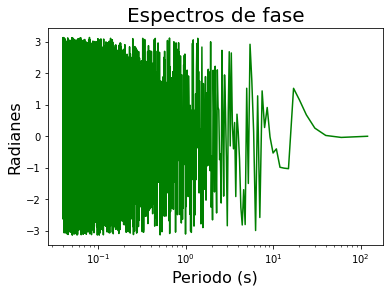

In [67]:
plt.semilogx(w_2,angle_1[0:2999],'g')
plt.ylabel('Radianes', fontsize=16,fontname='times new roman')
plt.xlabel('Periodo (s)', fontsize=16,fontname='times new roman')
plt.title('Espectros de fase', fontsize=20,fontname='times new roman')
_=plt.show()

# Corte de ventana de 120s a 240s

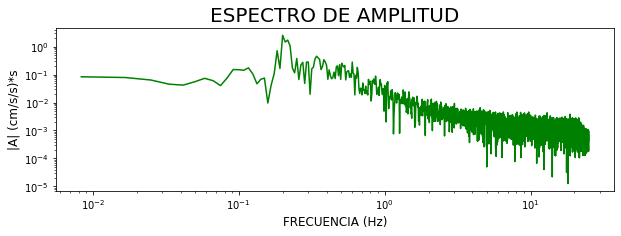

In [154]:
fig = plt.figure(figsize=(10,3))
plt.loglog(f_1,asb_2[0:2999],'g')
plt.ylabel('|A| (cm/s/s)*s', fontsize=12,fontname='times new roman')
plt.xlabel('FRECUENCIA (Hz)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE AMPLITUD', fontsize=20,fontname='times new roman')
_=plt.show()
#plt.ylim(0,2.8)
#plt.xlim(0,1)
_=plt.show()

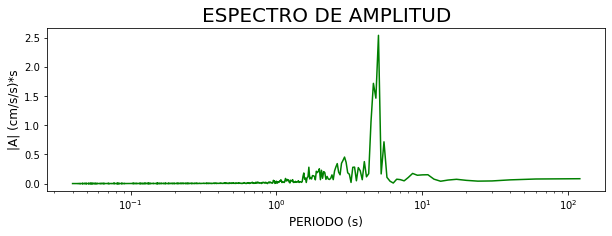

In [122]:
fig = plt.figure(figsize=(10,3))
plt.semilogx(w_2,asb_2[0:2999],'g')
plt.ylabel('|A| (cm/s/s)*s', fontsize=12,fontname='times new roman')
plt.xlabel('PERIODO (s)', fontsize=12,fontname='times new roman')
plt.title('ESPECTRO DE AMPLITUD', fontsize=20,fontname='times new roman')
_=plt.show()
#plt.xlim(0,15)
_=plt.show()

# Espectro

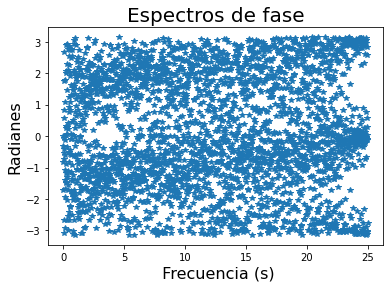

In [70]:
plt.plot(f_1,angle_2[0:2999],'*')
plt.ylabel('Radianes', fontsize=16,fontname='times new roman')
plt.xlabel(' Frecuencia (s)', fontsize=16,fontname='times new roman')
plt.title('Espectros de fase', fontsize=20,fontname='times new roman')
_=plt.show()

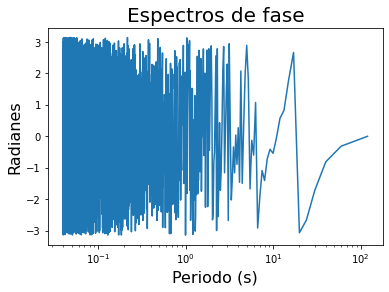

In [71]:
plt.semilogx(w_2,angle_2[0:2999])
plt.ylabel('Radianes', fontsize=16,fontname='times new roman')
plt.xlabel('Periodo (s)', fontsize=16,fontname='times new roman')
plt.title('Espectros de fase', fontsize=20,fontname='times new roman')
_=plt.show()